# SunPy and HelioPy Tutorial

Viewing solar data with SunPy
---
In the first half of this tutorial, we'll look at how to search for, download, and plot remote sensing data using SunPy.

Searching and Downloading Data with SunPy
---
In order to search for some data, we have to select a time range and an instrument to search for. In addition, here we also specify the wavelength of interest.

In [2]:
from sunpy.net import Fido, attrs as a
import astropy.units as u

Searching for data
---
Using the above defined search parameters, Fido can be used to search for data. For more information on searching for and downloading data see https://docs.sunpy.org/en/stable/guide/acquiring_data/index.html

In [56]:
hmi = a.Instrument("lasco")
aia = a.Instrument("AIA") & a.Wavelength(19.3 * u.nm)
sot = a.Instrument("SOT") & a.Wavelength(6301 * u.AA)

In [57]:
result = Fido.search(a.Time("2018/10/31 04:00", "2018-11-01 04:01"),
                     a.Sample(6*u.hour),
                     hmi | aia | sot)
result

<sunpy.net.fido_factory.UnifiedResponse object at 0x7fb5a71aaf98>
Results from 3 Providers:

0 Results from the VSOClient:
Start Time End Time  Source Instrument   Type 
 float64   float64  float64  float64   float64
---------- -------- ------- ---------- -------

5 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...   Type   Wavelength [2]
                                               ...             Angstrom   
       str19               str19         str3  ...   str8      float64    
------------------- ------------------- ------ ... -------- --------------
2018-10-31 10:00:04 2018-10-31 10:00:05    SDO ... FULLDISK 193.0 .. 193.0
2018-10-31 04:00:04 2018-10-31 04:00:05    SDO ... FULLDISK 193.0 .. 193.0
2018-10-31 22:00:04 2018-10-31 22:00:05    SDO ... FULLDISK 193.0 .. 193.0
2018-10-31 16:00:04 2018-10-31 16:00:05    SDO ... FULLDISK 193.0 .. 193.0
2018-11-01 04:00:04 2018-11-01 04:00:05    SDO ... FULLDISK 193.0 .. 193.0

1024 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...     Type     Wavelength [2] 
                                               ...                 Angstrom    
       str19               str19         str6  ...    str11        float64     
------------------- ------------------- ------ ... ----------- ----------------
2018-11-01 00:15:04 2018-11-01 00:15:05 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 00:15:09 2018-11-01 00:15:10 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 00:15:13 2018-11-01 00:15:14 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 00:15:16 2018-11-01 00:15:17 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 00:15:20 2018-11-01 00:15:21 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 00:15:24 2018-11-01 00:15:25 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 00:15:28 2018-11-01 00:15:29 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 00:15:32 2018-11-01 00:15:33 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 00:15:35 2018-11-01 00:15:36 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
                ...                 ...    ... ...         ...              ...
2018-11-01 02:32:51 2018-11-01 02:32:52 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 02:32:54 2018-11-01 02:32:55 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 02:32:58 2018-11-01 02:32:59 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 02:33:02 2018-11-01 02:33:03 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 02:33:06 2018-11-01 02:33:07 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 02:33:10 2018-11-01 02:33:11 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 02:33:13 2018-11-01 02:33:14 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 02:33:17 2018-11-01 02:33:18 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 02:33:21 2018-11-01 02:33:22 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2
2018-11-01 02:33:25 2018-11-01 02:33:26 Hinode ... PARTIAL_SUN 6300.8 .. 6303.2

Downloading data
---
The results from a search can also be downloaded.

``Fido.fetch`` returns a list of the local location of the downloaded files.

In [9]:
downloaded_files = Fido.fetch(result,
                              path="/tmp/hello/{instrument}/{file}")
downloaded_files

['/tmp/hello/AIA/aia_lev1_193a_2018_10_31t16_00_04_84z_image_lev1.fits', '/tmp/hello/AIA/aia_lev1_193a_2018_11_01t04_00_04_84z_image_lev1.fits', '/tmp/hello/AIA/aia_lev1_193a_2018_10_31t04_00_04_84z_image_lev1.fits', '/tmp/hello/AIA/aia_lev1_193a_2018_10_31t10_00_04_84z_image_lev1.fits', '/tmp/hello/AIA/aia_lev1_193a_2018_10_31t22_00_04_84z_image_lev1.fits']

SunPy `Map` and `MapSequence`
---
Now we have downloaded some data, we can load it and plot it. ``sunpy.map.Map`` can be used to load any ``.fits`` file, creating a ``Map`` object. We can then take a look at the image stored by calling ``map.peek()``.

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [11]:
import sunpy.map

## `MapSequence`

In [12]:
map_sequence = sunpy.map.Map(downloaded_files, sequence=True)

<IPython.core.display.Javascript object>


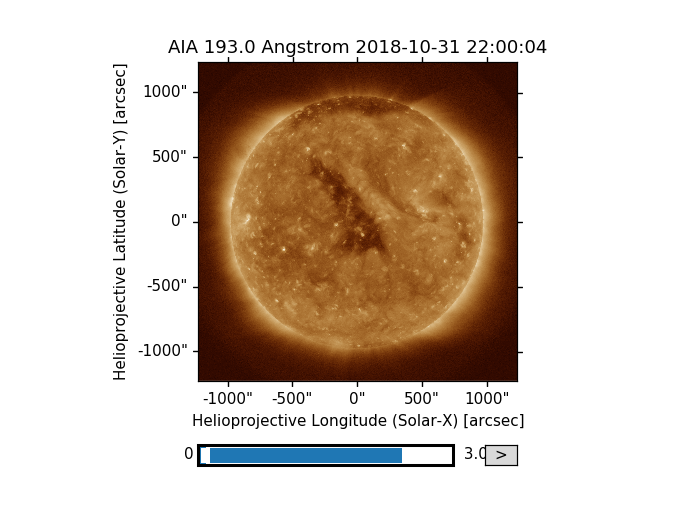

In [13]:
map_sequence.peek()

In [14]:
for m in map_sequence:
    m.plot_settings['norm'].vmin = 0
    m.plot_settings['norm'].vmax = map_sequence[2].data.max()

<IPython.core.display.Javascript object>


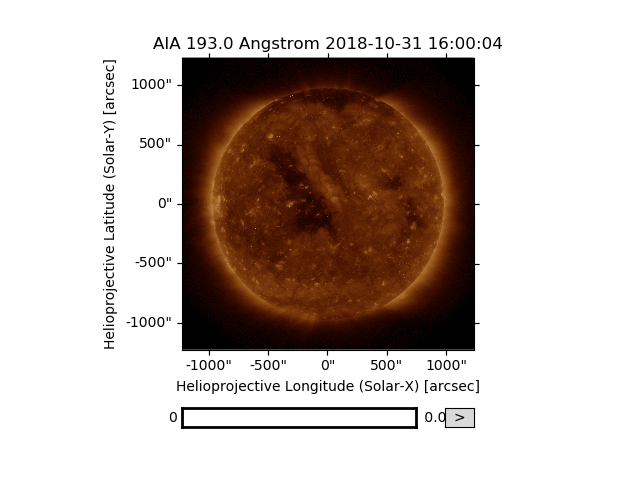

In [17]:
map_sequence.peek()

## `Map`

In [18]:
aiamap = map_sequence[2]

In [19]:
aiamap

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 2
Detector:		 AIA
Measurement:		 193.0 Angstrom
Wavelength:		 193.0 Angstrom
Observation Date:	 2018-10-31 16:00:04
Exposure Time:		 2.000083 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.600714 0.600714] arcsec / pix
Reference Pixel:	 [2042.01001  2043.030029] pix
Reference Coord:	 [0. 0.] arcsec
array([[ 0, -1, -1, ..., -1,  0,  0],
       [-1, -1,  1, ..., -1,  1,  0],
       [-1, -2, -1, ..., -2, -1,  0],
       ...,
       [-2,  0, -1, ...,  2,  2, -3],
       [-1,  1, -1, ...,  0,  0,  1],
       [ 1, -1, -1, ...,  3,  2, -1]], dtype=int16)

In [20]:
aiamap.meta

MetaDict([('xtension', 'IMAGE'),
          ('bitpix', 16),
          ('naxis', 2),
          ('naxis1', 4096),
          ('naxis2', 4096),
          ('pcount', 0),
          ('gcount', 1),
          ('bld_vers', 'V9R2X'),
          ('lvl_num', 1.0),
          ('t_rec', '2018-10-31T16:00:06Z'),
          ('trecstep', 1.0),
          ('trecepoc', '1977.01.01_00:00:00_TAI'),
          ('trecroun', 1),
          ('origin', 'SDO/JSOC-SDP'),
          ('date', '2018-11-04T08:28:41'),
          ('telescop', 'SDO/AIA'),
          ('instrume', 'AIA_2'),
          ('date-obs', '2018-10-31T16:00:04.84'),
          ('t_obs', '2018-10-31T16:00:05.84Z'),
          ('camera', 2),
          ('img_type', 'LIGHT'),
          ('exptime', 2.000083),
          ('expsdev', 0.000199),
          ('int_time', 2.273438),
          ('wavelnth', 193),
          ('waveunit', 'angstrom'),
          ('wave_str', '193_THIN'),
          ('fsn', 181754586),
          ('fid', 0),
          ('quallev0', 0),
          ('q

In [21]:
aiamap.coordinate_frame

<Helioprojective Frame (obstime=2018-10-31T16:00:04.840, rsun=696000000.0 m, observer=<HeliographicStonyhurst Coordinate (obstime=2018-10-31T16:00:04.840): (lon, lat, radius) in (deg, deg, m)
    (0.01269758, 4.44352423, 1.48484522e+11)>)>

In [27]:
aiamap.observer_coordinate

<SkyCoord (HeliographicStonyhurst: obstime=2018-10-31T16:00:04.840): (lon, lat, radius) in (deg, deg, m)
    (0.01269758, 4.44352423, 1.48484522e+11)>

## Coordinates

![SunPy Graph](http://docs.sunpy.org/en/latest/_images/graphviz-2fafba2dd42c9a3e49915c57f04a039dda5cc9a4.svg)

In [23]:
aiamap.observer_coordinate.transform_to("heliocentrictrueecliptic")

<SkyCoord (HeliocentricTrueEcliptic: equinox=J2000.000, obstime=2018-10-31T16:00:04.840): (lon, lat, distance) in (deg, deg, m)
    (37.92830483, 0.00197854, 1.48484522e+11)>

In [24]:
aiamap.observer_coordinate.transform_to("heliographic_carrington")

<SkyCoord (HeliographicCarrington: obstime=2018-10-31T16:00:04.840): (lon, lat, radius) in (deg, deg, m)
    (296.71051065, 4.44352423, 1.48484522e+11)>

In [25]:
aiamap.pixel_to_world(0*u.pixel, 0*u.pixel)

<SkyCoord (Helioprojective: obstime=2018-10-31T16:00:04.840, rsun=696000000.0 m, observer=<HeliographicStonyhurst Coordinate (obstime=2018-10-31T16:00:04.840): (lon, lat, radius) in (deg, deg, m)
    (0.01269758, 4.44352423, 1.48484522e+11)>): (Tx, Ty) in arcsec
    (-1224.81574674, -1227.87116476)>

## Plotting

In [30]:
from astropy.coordinates import SkyCoord

In [36]:
top_right_point = SkyCoord(-400*u.arcsec, 550*u.arcsec, frame=aiamap.coordinate_frame)
bottom_left_point = SkyCoord(-600*u.arcsec, 350*u.arcsec, frame=aiamap.coordinate_frame)

<IPython.core.display.Javascript object>


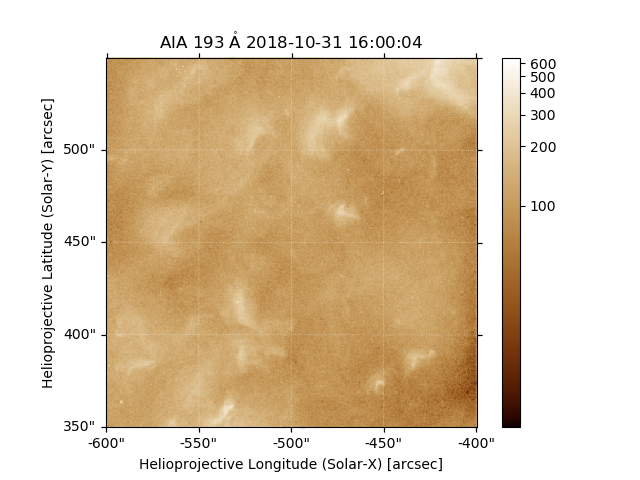

In [38]:
sub = aiamap.submap(top_right_point, bottom_left_point)
sub.peek()

In [34]:
aiamap.world_to_pixel(point)

PixelPair(x=<Quantity 1376.05518203 pix>, y=<Quantity 2958.27963857 pix>)

<IPython.core.display.Javascript object>


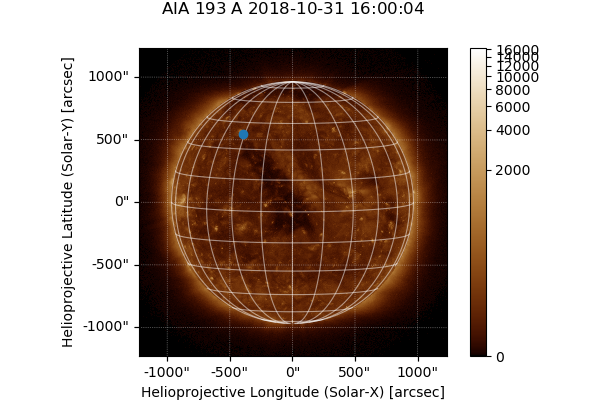

In [39]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(projection=aiamap)

aiamap.plot(ax)
aiamap.draw_grid()

ax.plot_coord(point, 'o')

plt.colorbar()

Identifying a coronal hole
---
In the above AIA 193 image, there is a dark patch in the middle of the disc. This is a coronal hole, which is the source of the fastest solar wind.

This observation can be connected to in-situ measurements of the solar wind at 1 AU by looking for the fast solar wind stream that emmenates from this coronal hole. Because the solar wind takes a finite amount of time to propagate from the Sun to Earth, we first do an order of magnitude estimate of this delay.

Using astropy units
---
To calculate the propagation delay we can use the ``astropy.units`` module. This provides an extension of normal numbers and arrays, and allows units to be attached. All the unit mathematics is calculated automatically, avoiding the need to keep track of specific units.

In [40]:
import astropy.constants as const
from sunpy.coordinates.ephemeris import get_earth

Assume the solar wind is relesed from the surface of the Sun, so the propagation distance is $D_{sun} - R_{sun}$

In [41]:
d_sun = get_earth(aiamap.date)
d_sun

<SkyCoord (HeliographicStonyhurst: obstime=2018-10-31T16:00:04.840): (lon, lat, radius) in (deg, deg, AU)
    (0., 4.44005377, 0.99272415)>

In [42]:
d = (d_sun.radius - const.R_sun)
d

<Distance 0.98807368 AU>

Take a typical fast solar wind speed of 500 km/s

In [43]:
vsw = 500 * u.km / u.s
vsw

<Quantity 500. km / s>

In [45]:
vsw.to(u.imperial.mile/u.hour)

<Quantity 1118468.1460272 mi / h>

Calculate tne propagation time, and convert it to units of days

In [47]:
t = (d / vsw).to(u.day)
t

<Quantity 3.42161386 d>

In [52]:
t.to_value(u.day)

3.4216138602344746

In [48]:
estimated_arrival = aiamap.date + t
estimated_arrival

<Time object: scale='utc' format='isot' value=2018-11-04T02:07:12.278>

In [51]:
estimated_arrival.format = "fits"
estimated_arrival.datetime

datetime.datetime(2018, 11, 4, 2, 7, 12, 277524)

Downloading and importing in-situ data
---
The ``heliopy.data`` module can be used to download and import a wide range of in situ datasets from various heliospheric missions. In this example we use data from OMNI, which provides measurements of the solar wind at the orbit of the Earth.

In [61]:
from heliopy.data import omni

In [62]:
starttime = aiamap.date - (1*u.year / 12)
endtime = aiamap.date + (1*u.year / 12)

omni_data = omni.low(starttime.datetime, endtime.datetime)

The data is stored in a [SunPy TimeSeries](https://docs.sunpy.org/en/latest/code_ref/timeseries.html) object:

In [63]:
omni_data

In [64]:
omni_data.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2018-10-01 06:00:00        | Bartels Rotatio |                                                   |
|            to             | ID IMF Spacecra |                                                   |
|2018-12-01 02:00:00        | ID SW Plasma Sp |                                                   |
|                           | points(IMF Aver |                                                   |
|                           | points(Plasma A |                                                   |
|                           | |B|             |                                                   |
|                           | Magnitude of Av |                                                   |


We can print the available columns in this object:

In [66]:
for col in omni_data.columns:
    print(col)

Bartels Rotation Number
ID IMF Spacecraft
ID SW Plasma Spacecraft
points(IMF Average)
points(Plasma Average)
|B|
Magnitude of Avg Field Vector
Lat. Angle of Aver. Field Vector
Long. Angle of Aver. Field Vector
Bx GSE, GSM
By GSE
Bz GSE
By GSM
Bz GSM
sigma |B|
sigma B
sigma Bx
sigma By
sigma Bz
Proton Temperature
Proton Density
Plasma Flow Speed
Plasma Flow Long. Angle
Plasma Flow Lat. Angle
Na/Np
Flow Pressure
sigma T
sigma N
sigma V
sigma phi V
sigma theta V
sigma Na/Np
Electric Field
Plasma Beta
Alfven Mach Number
Kp
R
DST Index
AE Index
Proton Flux > 1MeV
Proton Flux > 2MeV
Proton Flux > 4MeV
Proton Flux > 10MeV
Proton Flux > 30MeV
Proton Flux > 60MeV
flag
ap index
f10.7 index
PC(N) index
AL index (Kyoto)
AU index (Kyoto)
Magnetosonic Mach No.


In [67]:
omni_data.units

OrderedDict([('Bartels Rotation Number', Unit(dimensionless)),
             ('ID IMF Spacecraft', Unit(dimensionless)),
             ('ID SW Plasma Spacecraft', Unit(dimensionless)),
             ('points(IMF Average)', Unit(dimensionless)),
             ('points(Plasma Average)', Unit(dimensionless)),
             ('|B|', Unit("nT")),
             ('Magnitude of Avg Field Vector', Unit("nT")),
             ('Lat. Angle of Aver. Field Vector', Unit("deg")),
             ('Long. Angle of Aver. Field Vector', Unit("deg")),
             ('Bx GSE, GSM', Unit("nT")),
             ('By GSE', Unit("nT")),
             ('Bz GSE', Unit("nT")),
             ('By GSM', Unit("nT")),
             ('Bz GSM', Unit("nT")),
             ('sigma |B|', Unit("nT")),
             ('sigma B', Unit("nT")),
             ('sigma Bx', Unit("nT")),
             ('sigma By', Unit("nT")),
             ('sigma Bz', Unit("nT")),
             ('Proton Temperature', Unit("K")),
             ('Proton Density', Unit("1 

Plotting in-situ data
---
Matplotlib can be used to plot the downloaded data. In this example we plot the solar wind speed and the magnetic field clock angle, to see different polarity solar wind streams.

In [68]:
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fb5a66b5828>

<IPython.core.display.Javascript object>


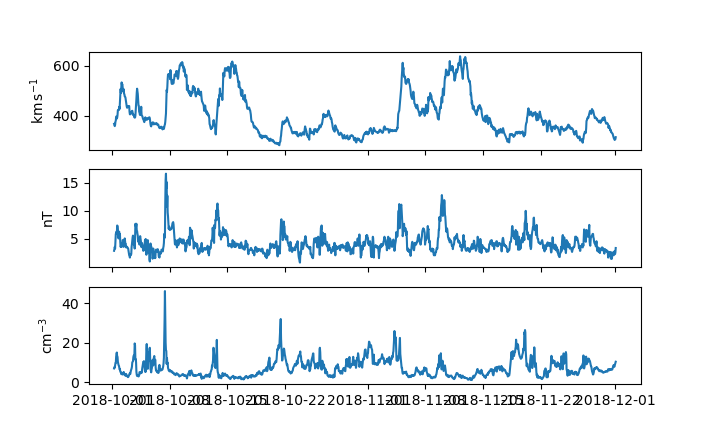

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [69]:
fig, axs = plt.subplots(nrows=3, figsize=(9, 6), sharex=True)

ax = axs[0]
ax.plot(omni_data.index, omni_data.quantity("Plasma Flow Speed"), label="$v_{sw}$")

ax = axs[1]
ax.plot(omni_data.index, omni_data.quantity("|B|"), label="$|B|$")

ax = axs[2]
ax.plot(omni_data.index, omni_data.quantity("Proton Density"), label="$n_p$")

Improving figure formatting
---

We can improve this plot a little with some better formatting.

We also add a vertical line where the stream is fast stream is predicted to have arrived using the above back-of-the-envelope calculation. We can see that it lines up nicely with a fast solar wind stream that has speeds of 500 - 600 km/s.

<IPython.core.display.Javascript object>


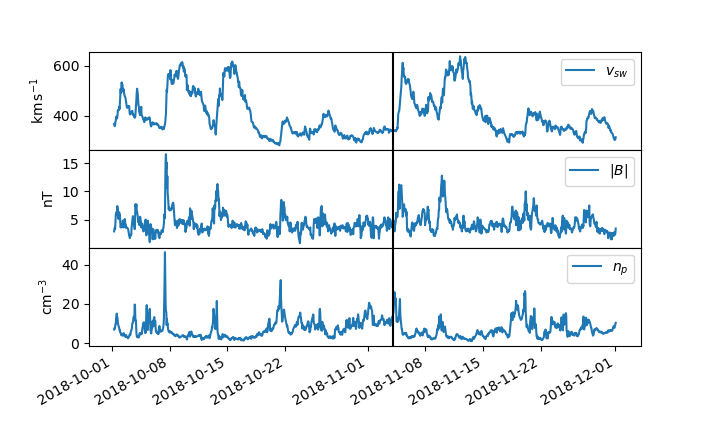

In [70]:
fig.autofmt_xdate()
fig.subplots_adjust(hspace=0)

for ax in axs:
    ax.legend()
    ax.axvline(estimated_arrival.datetime, color='k')
    
fig

Save a copy of the figure
---

In [71]:
fig.savefig("tseries.pdf", bbox_inches="tight")